In [58]:
! pip install opencv-python

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
img=cv2.imread("Images\landscape.jpg",1) 
#1->coloured image ->3D matrix (RGB)
#2->grayscale image->2D matrix

out_r = 100
r,c,ch = img.shape

img.shape


(902, 1443, 3)

In [61]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

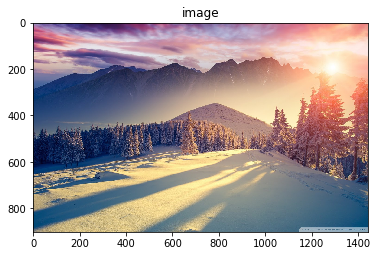

In [62]:
#display the image
plt.imshow(img)
plt.title("image")
plt.show()

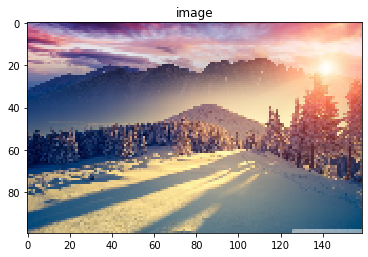

In [63]:
#resize image
img = cv2.resize(img, (int(out_r*float(c)/r), out_r))
plt.imshow(img)
plt.title("image")
plt.show()

In [75]:
# reshape image
reshaped=img.reshape((-1, 3))


In [65]:
from sklearn.cluster import KMeans

In [66]:
km=KMeans(n_clusters=8)
km.fit(reshaped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
centr_colors=np.array(km.cluster_centers_,dtype='uint8')
print(centr_colors,centr_colors.shape)

[[245 217 178]
 [108 115 132]
 [141  85  90]
 [166 139 135]
 [ 26  44  87]
 [195 167 184]
 [ 60  81 116]
 [221 174 136]] (8, 3)


In [77]:
frq=np.array(np.unique(km.labels_,return_counts=True)[1],dtype='float32')
print(frq)
print(frq.sum())

frq= frq/reshaped.shape[0]
print(frq)
print(frq.sum())

[2496. 2373. 1325. 2578. 1683. 1208. 2207. 2030.]
15900.0
[0.15698113 0.14924528 0.08333334 0.16213836 0.10584906 0.07597484
 0.13880503 0.12767296]
1.0


In [79]:
dom=[[frq[ix],centr_colors[ix]] for ix in range(km.n_clusters)]

DOM=sorted(dom, key=lambda z:z[0] , reverse=True)
print(DOM[0][1])

[166 139 135]


In [80]:
for ix in DOM:
    print(ix)
    print("---------------------")

[0.16213836, array([166, 139, 135], dtype=uint8)]
---------------------
[0.15698113, array([245, 217, 178], dtype=uint8)]
---------------------
[0.14924528, array([108, 115, 132], dtype=uint8)]
---------------------
[0.13880503, array([ 60,  81, 116], dtype=uint8)]
---------------------
[0.12767296, array([221, 174, 136], dtype=uint8)]
---------------------
[0.10584906, array([26, 44, 87], dtype=uint8)]
---------------------
[0.083333336, array([141,  85,  90], dtype=uint8)]
---------------------
[0.075974844, array([195, 167, 184], dtype=uint8)]
---------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


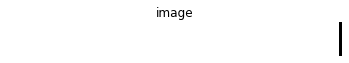

In [85]:
patch=np.zeros((50,500,3))
start =0
for ix in range(km.n_clusters):
    width=int(DOM[ix][0]*patch.shape[1])
    end=start+width
    patch[:,start:end,:]=DOM[ix][1]
    start=end
    plt.axis("off")
    plt.imshow(patch)
cv2.imwrite('output.jpg',patch)
plt.imshow(patch)
plt.title("image")
plt.show()